In [175]:
# Understand the Test: You’re looking at the results of an experiment where two versions of a webpage (a new one and an old one) were shown to visitors.
# Make a Decision: Based on the data, help the company decide if the new page is better, if they should stick with the old page, or if they need more information before deciding.    

In [176]:
#PART 1 : PROBABILITY

In [177]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)

In [178]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [180]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [181]:
df.shape[0] #to find the number of rows in the dataset.

294478

In [182]:
df.user_id.nunique() #The number of unique users in the dataset.

290584

In [183]:
df.converted.mean()

0.11965919355605512

In [184]:
#he number of times the new_page and treatment don’t line up” means 
#we’re counting how often things don’t match up in an experiment. 
#it means counting how many times users in the 
#treatment group (who are supposed to see the new version of a page)
#are actually shown the old page, or vice versa—users in the 
#control group (who are supposed to see the old page) are shown the new page1.
#Imagine you’re testing two different web page designs: one old and one new. 
#Some people are supposed to see the new design (this is the ‘treatment’ group), 
#and others should see the old one. But sometimes, mistakes happen, 
#and people see the wrong page. So, this count is all about finding 
#and fixing those mix-ups to make sure the experiment is fair and the 
#results are trustworthy. 
#It’s like making sure everyone gets the right order at a restaurant – 
#it keeps customers happy and the business running smoothly!

x = df.query('landing_page == "new_page" and group == "control"').count()
y = df.query('landing_page == "old_page" and group == "treatment"').count()
x+y

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [185]:
#to find the rows have missing values
df.isnull().sum().any()

False

In [186]:
# Identify the Mix-ups: Find all the rows where the group (treatment or control) doesn’t match the page version (new or old) they’re supposed to see.
# Remove the Affected Rows: Delete these rows from your data because they could mess up your experiment’s results.
# Clean Data: By removing these rows, you make sure that only the correct data is used to judge whether the new page is better or not.

# ind1 is used to find all rows where the landing_page is “new_page” but the group is “control”. This is a mismatch because the control group should see the old page, not the new one.
# ind2 is used to find all rows where the landing_page is “old_page” but the group is “treatment”. This is also a mismatch because the treatment group should see the new page, not the old one.

ind1 = df.query('landing_page == "new_page" and group == "control"').index
ind2 = df.query('landing_page == "old_page" and group == "treatment"').index
ind1, ind2

(Index([    22,    240,    490,    846,    850,    988,   1198,   1354,   1474,
          1877,
        ...
        293393, 293480, 293568, 293662, 293888, 293894, 293996, 294200, 294253,
        294331],
       dtype='int64', length=1928),
 Index([   308,    327,    357,    685,    713,    776,    889,   1037,   1106,
          1376,
        ...
        293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917, 294014,
        294252],
       dtype='int64', length=1965))

In [187]:
# Dropping the rows where new page is not aligned with treatment
#axis=0 parameter specifies that the operation should be performed along the index axis, 
#which is the rows of the DataFrame. 
#So, this command is telling pandas to create a new DataFrame df2 by removing the rows with index values in ind1 from the original DataFrame df.
df2 = df.drop(index = ind1, axis=0)  

In [188]:
# Dropping the rows where old page is not aligned with control
df2 = df2.drop(index = ind2, axis = 0)

In [189]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group']=='control') == (df2['landing_page']=='old_page')) == False].shape[0]

0

In [190]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [191]:
#to find unique user_ids are in df2
df2.user_id.nunique()

290584

In [192]:
#to find user_id repeated in df2
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

In [193]:
#to remove one of the rows with a duplicate user_id
df2.drop(index = 2893, axis = 0, inplace = True)

In [194]:
# Verifying the duplicate row has been removed
sum(df2.user_id.duplicated())

0

In [195]:
#to find probability of an individual converting regardless of the page they receive

df2.converted.mean()

0.11959708724499628

In [196]:
#Given that an individual was in the control group, what is the probability they converted?

df2.query('group == "control"').converted.mean()

0.1203863045004612

In [197]:
#Given that an individual was in the treatment group, what is the probability they converted?

df2.query('group == "treatment"').converted.mean()

0.11880806551510564

In [198]:
#According to the probabilities, the control group (the group with the old page) converted at a higher rate than the teatment (the group with the new page)

In [199]:
#What is the probability that an individual received the new page?

df2.query('landing_page == "new_page"').landing_page.count() / (df2.shape[0])

0.5000619442226688

In [200]:
##What is the probability that an individual received the old page?
df2.query('landing_page == "old_page"').landing_page.count()/ (df2.shape[0])

0.4999380557773312

In [201]:
#conclusion
# No Clear Winner: The experiment doesn’t show a clear advantage for the new treatment page over the old one in terms of getting more people to take action (conversions).
# Similar Conversion Rates: The percentage of users who took the desired action after seeing the old page (12.03%) is almost the same as the percentage who did so after seeing the new page (11.88%).
# Equal Chances: The likelihood of someone seeing the new page or the old page was about the same, so there was no unfair advantage.
# Balanced Groups: The number of users who saw the old page and the number who saw the new page were pretty much equal, so the comparison is fair.

In [202]:
# Question 1: Hypotheses

# Null Hypothesis (H0): The old page is just as good as or better than the new page at converting users.
# Alternative Hypothesis (H1): The new page is better than the old page at converting users.


# Question 2: Conversion Rates

# Assumption: Both the new and old pages convert users at the same rate in the real world.
# Equal Rates: We use the overall conversion rate from the data as the common rate for both pages.
# Sampling Distribution: We simulate what would happen if this assumption were true by repeating an experiment many times.
# Conversion Rate Under Null: Since we assume the pages are equal, the conversion rate for the new page (pnew) is the same as the old page (pold), which is the average rate we observe in the data.

In [203]:
#What is the convert rate for p_new under the null?

p_new = df2.converted.mean()
p_new

0.11959708724499628

In [204]:
#What is the convert rate for p_old under the null?

p_old = df2.converted.mean()
p_old

0.11959708724499628

In [205]:
#n_new represents the number of rows in the dataframe treatment_df
# Create dataframe with all treatment records
treatment_df = df2.query('group == "treatment"') 
n_new = treatment_df.shape[0]
n_new

145310

In [206]:
#n_old represents the number of rows in the dataframe control_df
# Create dataframe with all control records
control_df = df2.query('group == "control"') 
n_old = control_df.shape[0]
n_old

145274

In [207]:
# Simulate Transactions: Pretend to run n_new tests, where n_new is the number of users who saw the new page.
# Conversion Rate: Use p_new as the probability that each user will ‘convert’ (like making a purchase or clicking a button).
# Under the Null: Assume there’s no difference between the new and old pages in terms of conversion rate.
# Store Results: Keep track of each simulated user’s action (1 for conversion, 0 for no conversion) in an array called new_page_converted.
#new_page_converted will be a number representing how many users, out of all those shown the new page (n_ne)
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17257

In [208]:
#similary,
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17474

In [209]:
#Find p_new - p_old for your simulated values

p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

-0.0015231586941583386

In [210]:
#Simulate 10,000 p_new - p_old values using this same process similarly 
#Store all 10,000 values in a numpy array called p_diffs.

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
    p_diffs.append(p_diff)

p_diffs = np.array(p_diffs)

In [211]:
# calculating the actual difference observed between conversion rates for new and old pages in the given dataset
control_cnv = control_df.converted.mean()
treatment_cnv = treatment_df.converted.mean()
obs_diff = treatment_cnv - control_cnv
obs_diff

-0.0015782389853555567

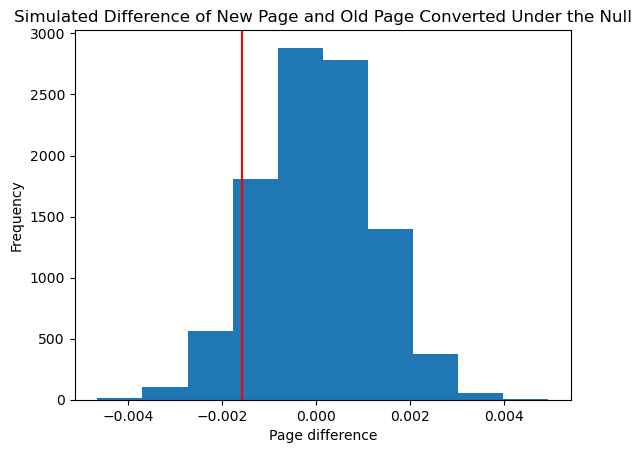

In [212]:
# plotting p_diffs distribution
plt.hist(p_diffs)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
# plotting the line for the observed difference between conversion rates for new and old pages
plt.axvline(x=obs_diff,  c='red');
#plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")

In [213]:
# p-value
(p_diffs > obs_diff).mean()

0.9045

In [214]:
#in your case, since the p-value is 0.9, which is way above 0.05, we’re not convinced that the new page is any better than the old one based on the data we have

In [215]:
# import statsmodels.api as sm: This imports the statsmodels library, which is used for statistical modeling and tests, and gives it the alias sm for ease of use.
# convert_old = df2.query('landing_page == "old_page"').converted.sum(): This calculates the total number of conversions for the old page. It filters df2 for rows where the landing_page is “old_page”, then sums up the converted column, which indicates whether a user converted (1) or not (0).
# convert_new = df2.query('landing_page == "new_page"').converted.sum(): Similar to the previous line, this calculates the total number of conversions for the new page.
# n_old = len(df2.query('landing_page == "old_page"')): This counts the total number of users who were shown the old page by filtering df2 for rows where the landing_page is “old_page” and then getting the length of that subset.
# n_new = len(df2.query('landing_page == "new_page"')): This counts the total number of users who were shown the new page in a similar manner to n_old.

import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

In [216]:
zstat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
zstat, p_value

(1.3109241984234394, 0.9050583127590245)

In [217]:
#regression
# df2.head()

In [218]:
# df2['intercept'] = 1
# df2[['ab_page1', 'ab_page']] = pd.get_dummies(df2['group'])
# df2.drop('ab_page1', axis = 1, inplace = True)
# df2.head()

In [219]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [220]:
# # Ensure 'converted' is binary
# df2['converted'] = df2['converted'].apply(lambda x: 1 if x == 'success' else 0)

# # Drop any missing values
# df2 = df2.dropna()

# Convert data types to numeric
# df2['intercept'] = df2['intercept'].astype(int)
# df2['ab_page'] = df2['ab_page'].astype(int)
# df2


In [221]:
# # Fit the logistic regression model
# log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# # results = log_mod.fit()
# results = log_mod.fit(method='bfgs')


In [222]:
# results.summary()

In [223]:
df_page = pd.get_dummies(data=df2, columns=['landing_page'], prefix='').rename(columns=lambda x: x.strip('_'))
df_page.head()

,user_id,timestamp,group,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,0,False,True
1,804228,2017-01-12 08:01:45.159739,control,0,False,True
2,661590,2017-01-11 16:55:06.154213,treatment,0,True,False
3,853541,2017-01-08 18:28:03.143765,treatment,0,True,False
4,864975,2017-01-21 01:52:26.210827,control,1,False,True


In [227]:
df_page['new_page'].replace(['False', 'True '],[0, 1], inplace=True)
df_page['old_page'].replace(['False', 'True '],[0, 1], inplace=True)
df_page

,user_id,timestamp,group,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,0,False,True
1,804228,2017-01-12 08:01:45.159739,control,0,False,True
2,661590,2017-01-11 16:55:06.154213,treatment,0,True,False
3,853541,2017-01-08 18:28:03.143765,treatment,0,True,False
4,864975,2017-01-21 01:52:26.210827,control,1,False,True
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,0,False,True
294474,945152,2017-01-12 00:51:57.078372,control,0,False,True
294475,734608,2017-01-22 11:45:03.439544,control,0,False,True
294476,697314,2017-01-15 01:20:28.957438,control,0,False,True
